In [19]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time


# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [20]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [21]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [22]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [23]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [36]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #print(city_url)
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # To get the response and print response
        #response = requests.get(city_url)
        #print(city_weather)
        #city_weather = response.json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Cloudiness": city_clouds,
                          "Country": city_country,
                          "Date": city_date,
                          "Humidity": city_humidity,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Wind Speed": city_wind})                                        

# If an error is experienced, skip the city.
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        pass

    #time.sleep(1)
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mountain home
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | laguna
Processing Record 4 of Set 1 | clyde river
Processing Record 5 of Set 1 | illoqqortoormiut
'coord'
City not found. Skipping...
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | humaita
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | kisangani
Processing Record 13 of Set 1 | saint-tite
Processing Record 14 of Set 1 | luena
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | taolanaro
'coord'
City not found. Skipping...
Processing Record 17 of Set 1 | santa cruz
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 

In [37]:
len(city_data)

566

In [43]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mountain Home,1,US,2021-05-27 01:15:41,23,43.1330,-115.6912,69.94,10.78
1,Butaritari,74,KI,2021-05-27 01:17:36,79,3.0707,172.7902,83.59,18.86
2,Laguna,1,US,2021-05-27 01:15:39,26,38.4210,-121.4238,90.95,5.99
3,Clyde River,40,CA,2021-05-27 01:14:20,93,70.4692,-68.5914,26.83,17.27
4,Bambous Virieux,20,MU,2021-05-27 01:19:33,94,-20.3428,57.7575,71.85,4.83
5,Humaita,99,BR,2021-05-27 01:19:34,62,-7.5061,-63.0208,81.07,2.68
6,Atuona,77,PF,2021-05-27 01:19:36,75,-9.8000,-139.0333,79.61,13.47
7,Saint-Philippe,34,RE,2021-05-27 01:19:37,82,-21.3585,55.7679,69.39,2.21
8,Rikitea,94,PF,2021-05-27 01:19:38,69,-23.1203,-134.9692,75.25,19.60
9,Bethel,100,US,2021-05-27 01:20:01,68,41.3712,-73.4140,71.11,7.20


In [44]:
# Reorder the columns
new_column_order = ["City","Country","Date","Lat","Lng","Humidity","Cloudiness","Wind Speed","Max Temp"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Humidity,Cloudiness,Wind Speed,Max Temp
0,Mountain Home,US,2021-05-27 01:15:41,43.1330,-115.6912,23,1,10.78,69.94
1,Butaritari,KI,2021-05-27 01:17:36,3.0707,172.7902,79,74,18.86,83.59
2,Laguna,US,2021-05-27 01:15:39,38.4210,-121.4238,26,1,5.99,90.95
3,Clyde River,CA,2021-05-27 01:14:20,70.4692,-68.5914,93,40,17.27,26.83
4,Bambous Virieux,MU,2021-05-27 01:19:33,-20.3428,57.7575,94,20,4.83,71.85
5,Humaita,BR,2021-05-27 01:19:34,-7.5061,-63.0208,62,99,2.68,81.07
6,Atuona,PF,2021-05-27 01:19:36,-9.8000,-139.0333,75,77,13.47,79.61
7,Saint-Philippe,RE,2021-05-27 01:19:37,-21.3585,55.7679,82,34,2.21,69.39
8,Rikitea,PF,2021-05-27 01:19:38,-23.1203,-134.9692,69,94,19.60,75.25
9,Bethel,US,2021-05-27 01:20:01,41.3712,-73.4140,68,100,7.20,71.11


In [45]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [46]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

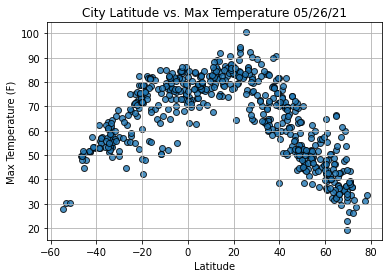

In [47]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

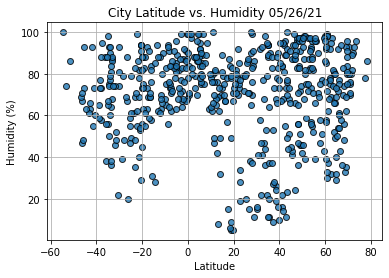

In [48]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

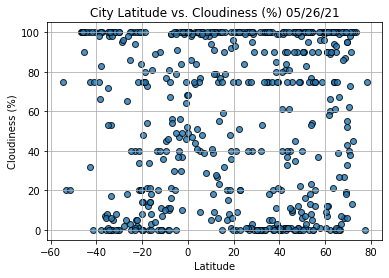

In [49]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

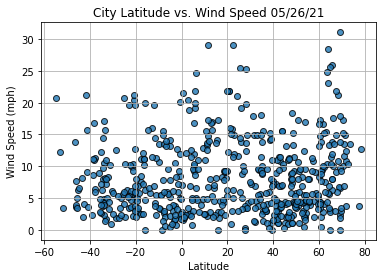

In [50]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()